# Preprocessing pipeline

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

## Starting the pipeline

In [3]:
from analysis.preprocess import PreprocessPipeline

pipeline = PreprocessPipeline(datasets_path=DATASET_PATH, disease_col_name=DISEASE_COLNAME)
pipeline.execute_pipeline()

INFO:root:Starting pipeline
INFO:root:Loading datasets
INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Loading file ../../dataset/first_disease_sel/GS/eGSE117146m.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM
INFO:root:Loading file ../../dataset/first_disease_sel/MCM/MCM_GSE149607.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE85804m.csv
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE34308m.csv
INFO:root:Loading file ../../dataset/first_disease_sel/NALD/eGSE117647m.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Loading file ../../dataset/first_disease_sel/A1A/A1A_deficiency_GSE109516_pbmc.csv
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO

## Inspecting the dataset we have built

In [4]:
dataset = pipeline.dataset
dataset

,RNF187,TYRO3,RANBP10,CHD4,TMOD3,MUTYH,POLR2D,DMD,RASSF1,UBA1,...,CDK2AP2,TRMT2A,PRR3,SPRY2,UBR2,TIE1,ENTPD4,THOC1,UBXN1,PACS1
0,0.391630,0.945629,0.382772,1.000000,0.684003,0.710067,0.329889,0.081550,0.028520,0.293141,...,0.000000,0.537114,0.482797,0.290449,0.000000,0.767586,0.697005,0.737159,0.579712,0.365185
1,0.119151,0.985543,0.619660,0.509851,0.316136,0.524066,0.455352,0.840399,0.164582,0.350136,...,0.504683,0.437772,0.720925,0.287219,0.145142,0.608851,0.716623,0.493580,0.762652,0.000000
2,0.350439,0.785097,0.519362,0.121087,0.189336,0.828175,0.830076,0.791110,0.210639,0.013148,...,0.739791,0.350277,0.841911,0.487099,0.409944,0.731490,0.739800,0.375386,0.881148,0.492771
3,0.648115,0.913603,0.738400,0.197057,0.495819,0.771786,0.475188,0.363907,0.000000,0.113239,...,0.572007,0.072669,0.201774,0.357633,0.315257,0.649896,0.572234,0.612393,0.697069,0.657070
4,0.767397,0.778949,0.542012,0.193207,0.672400,0.485425,0.102390,1.000000,0.366977,0.358973,...,0.466038,0.000000,0.897643,0.327716,0.337519,0.831849,0.401050,0.000000,0.439509,0.470810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000000,0.343891,0.651648,0.651012,0.264957,0.399240,0.800000,0.564241,0.695282,...,0.092219,0.459016,0.500000,0.000000,1.000000,0.166667,0.837095,0.709859,0.448864,0.626183
395,0.292630,0.000000,0.112476,0.123443,0.190283,0.615385,0.441065,0.000000,0.213836,0.374836,...,0.268012,0.675410,0.257353,0.362069,0.132672,0.000000,0.266928,0.377465,0.642045,0.221346
396,0.325444,0.333333,0.198449,0.101465,0.178138,0.846154,0.387833,0.400000,0.415993,0.193971,...,0.412104,0.931148,0.073529,0.051724,0.000000,0.111111,0.268891,0.352113,0.879419,0.308097
397,0.109198,0.666667,0.184228,0.110256,0.000000,0.000000,0.315589,0.200000,0.377358,0.119266,...,0.121037,0.406557,0.345588,0.413793,0.106729,0.166667,0.308145,0.253521,0.316288,0.212934


## Plot disease distribution

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

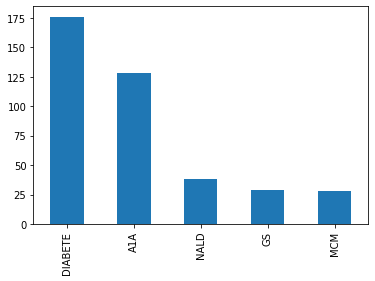

In [5]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

## Experiments

In [6]:
# getting data for disease MCM
mcm_dataset = dataset.loc[dataset.DISEASE == 'MCM']
mcm_dataset = mcm_dataset.drop(columns=['DISEASE'])

In [ ]:
import matplotlib.pyplot as plt
from bioinfokit import analys, visuz
import numpy as np

visuz.gene_exp.hmap(df=mcm_dataset, rowclus=False, colclus=False, dim=(10, 10), tickfont=(2, 4), show=True)

In [ ]:
ds = pipeline.dataset
rows, cols = ds.shape

rows, cols